<a href="https://colab.research.google.com/github/sausis20/Hands-On-Machine-Learning-with-Scikit-Learn-Keras-TensorFlow/blob/main/01_california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd '/content/gdrive/My Drive/Colab Notebooks/Hands-On-Machine-Learning-with-Scikit-Learn-Keras-TensorFlow/'

/content/gdrive/My Drive/Colab Notebooks/California housing


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
import seaborn as sns
sns.set(style='darkgrid')

## Import and first look at the data

In [ ]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()
# Attribute 'total_bedrooms' has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# We see that 'ocean_proximity' is of type object, meaning it is a categorical variable
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

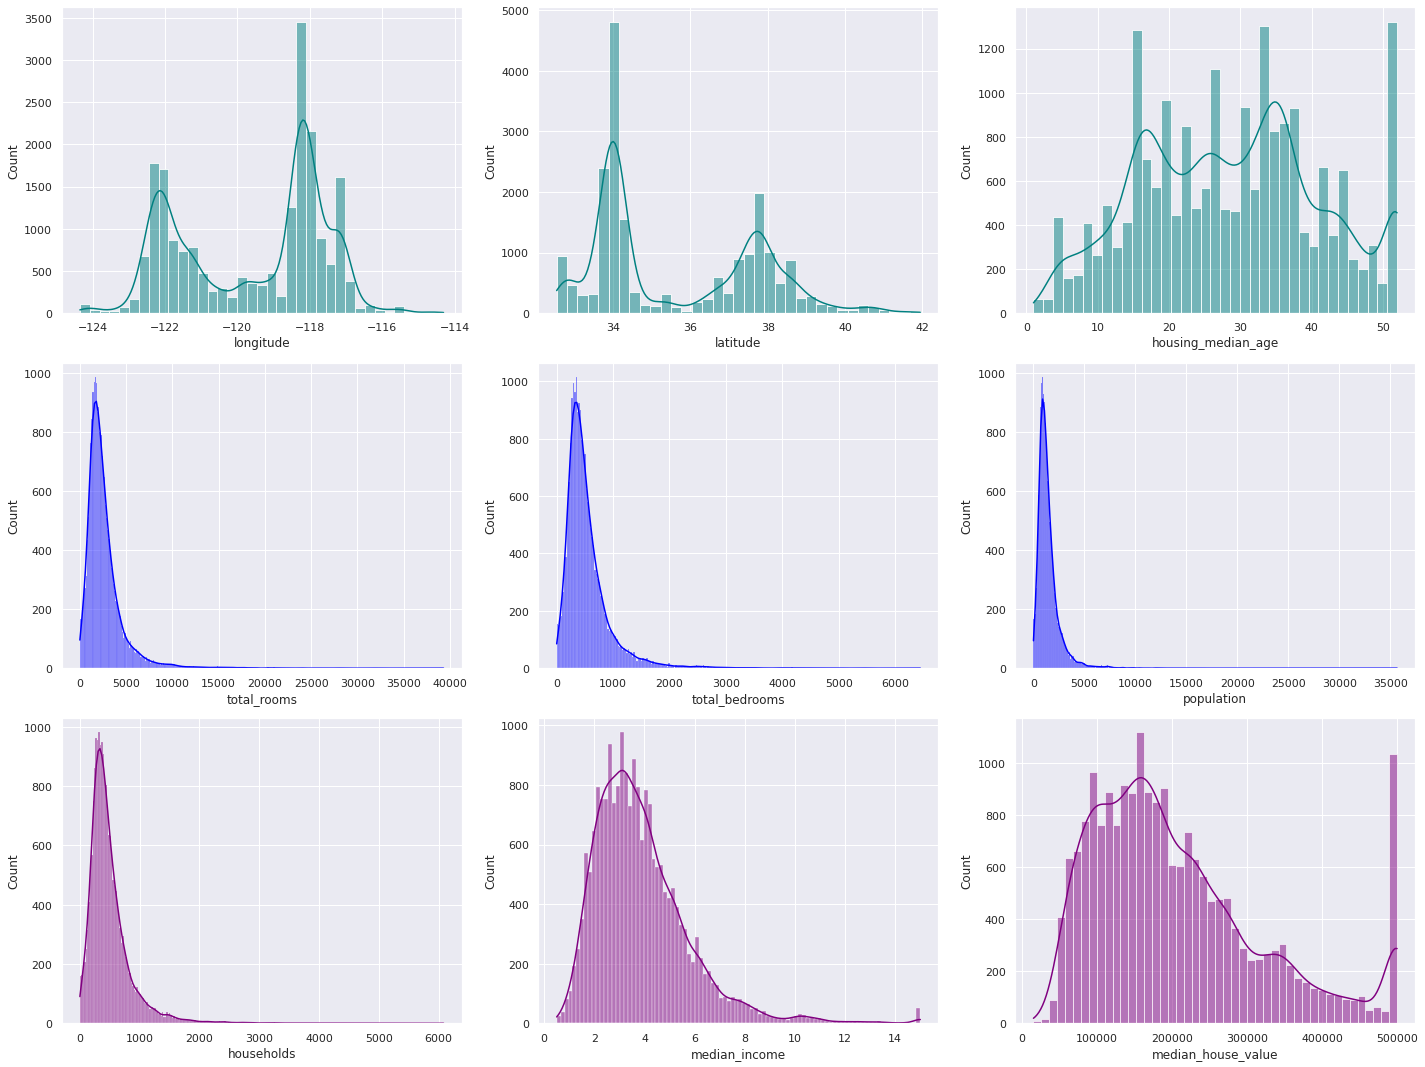

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
sns.histplot(data=df, x="longitude", kde=True, color="teal", ax=axs[0, 0])
sns.histplot(data=df, x="latitude", kde=True, color="teal", ax=axs[0, 1])
sns.histplot(data=df, x="housing_median_age", kde=True, color="teal", ax=axs[0, 2])
sns.histplot(data=df, x="total_rooms", kde=True, color="blue", ax=axs[1, 0])
sns.histplot(data=df, x="total_bedrooms", kde=True, color="blue", ax=axs[1, 1])
sns.histplot(data=df, x="population", kde=True, color="blue", ax=axs[1, 2])
sns.histplot(data=df, x="households", kde=True, color="purple", ax=axs[2,0])
sns.histplot(data=df, x="median_income", kde=True, color="purple", ax=axs[2,1])
sns.histplot(data=df, x="median_house_value", kde=True, color="purple", ax=axs[2,2])
fig.tight_layout()

# plotting with plt
# df.hist(figsize=(20,15));

We can notice a few things from the histograms: 
1.   First, the median income isn't expressed in US dollars (USD). The data has been scaled and capped at 15 for higher median incomes and at 0.5 for lower median incomes. The numbers represent roughly tens of
thousands of dollars (e.g., 3 actually means about $30,000). 

2.   The housing median age and the median house value were also capped.
The latter may be a serious problem since it is the target attribute
(labels). Machine Learning algorithms may learn that prices
never go beyond that limit. If we want to make precise predictions beyond USD 500,000, then there are two options:
   -   Collect proper labels for the districts whose labels were
capped.
   -   Remove those districts from the training set and the test set.
3. These attributes have very different scales.
4. Many histograms are tail-heavy: they extend much farther to
the right of the median than to the left. This may make it a bit harder
for some Machine Learning algorithms to detect patterns. We will try
transforming these attributes later on to have more bell-shaped
distributions.

### Create a test set

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# If we split the test data randomly, we might introduce bias, so it's a better idea so split the data using stratified 
# sampling, which ensures that the test set is representative of the various categories of incomes in the whole dataset.
df['income_cat'] = pd.cut(df['median_income'], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

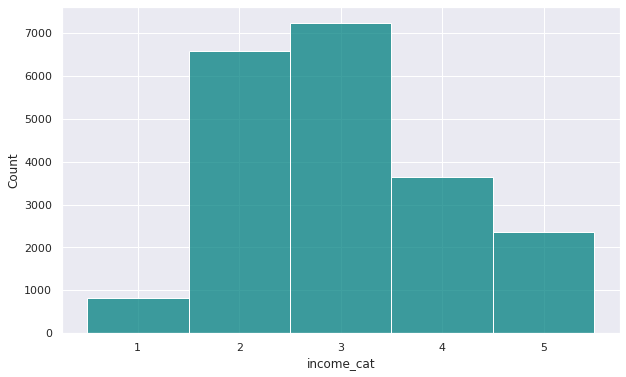

In [ ]:
sns.histplot(data=df, x='income_cat', color="teal")

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['income_cat']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [ ]:
print('Income category proportions on full dataset')
print(df['income_cat'].value_counts() / len(df))
print()
print('Income category proportions on stratified sampling')
print(strat_test_set['income_cat'].value_counts() / len(strat_test_set))

Income category proportions on full dataset
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

Income category proportions on stratified sampling
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64


In [ ]:
# Remove the income_cate attribute 
for _ in (strat_train_set, strat_test_set):
  _.drop('income_cat', axis=1, inplace=True)

In [ ]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


## Data exploration

In [ ]:
df = strat_train_set.copy()

### Visualizing geographical data

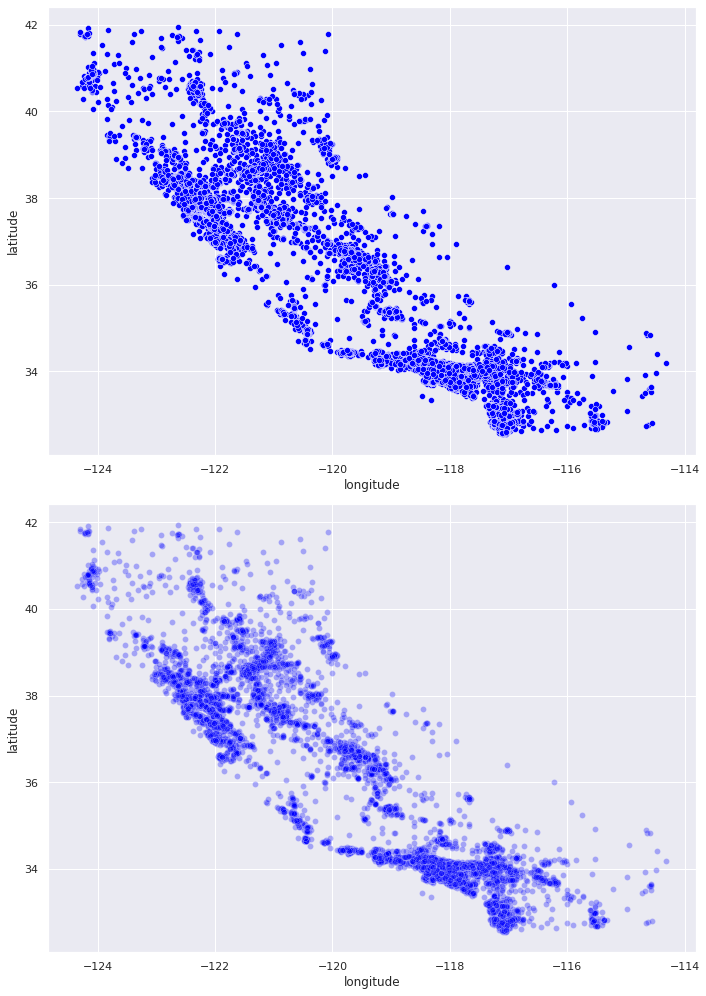

In [ ]:
# We can use a scatterplot to visualize longitude and latitude
fig, axs = plt.subplots(2, 1, figsize=(10, 14))
sns.scatterplot(data=df, x='longitude', y='latitude', color='blue', ax=axs[0])
sns.scatterplot(data=df, x='longitude', y='latitude', color='blue', ax=axs[1], alpha=0.3)
fig.tight_layout()

# We can clearly see the high-density areas, namely the Bay Area and around Los Angeles and San Diego, plus a long 
# line of fairly high density in the Central Valley

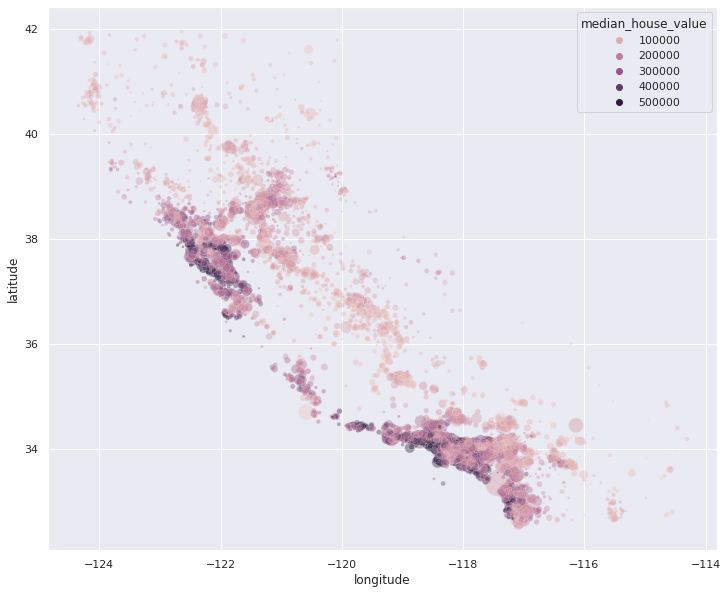

In [ ]:
# We can also visualize the housing prices, where the radius of each circle represents the district’s 
# population and the color represents the price.

plt.figure(figsize=(12,10))
sns.scatterplot(data=df, x='longitude', y='latitude', alpha=0.4, s=df['population']/50, 
                hue='median_house_value');

This image indicates that the housing prices are very much related to the
location (e.g., close to the ocean) and to the population density (e.g., prices are higher in metro areas)

### Correlations

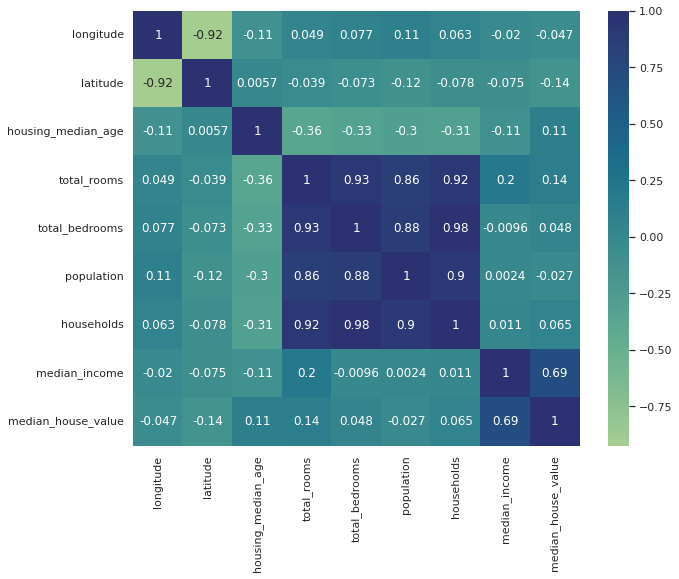

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="crest");

The heatmap shows that the median house value has the highest correlation with the median income (thus potentially, median income attribute could be the best predictor of the house value).

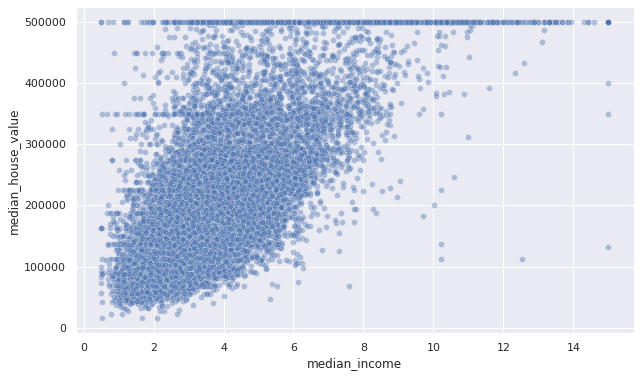

In [ ]:
sns.scatterplot(data=df, x='median_income', y='median_house_value', alpha=0.4);

We can see an upward trend, which confirms a strong correlation. Also,
the price cap at USD 500,000 is clearly visible as a horizontal line at the top. Interestingly, the plot reveals other straight lines - at around USD 450,000, USD 350,000. It might be worthwile to remove these instances to prevent your algorithms from learning to reproduce these data
quirks.

### Adding feature combinations

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [ ]:
# total_rooms and total_bedrooms show the total number for a district 
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

In [ ]:
# Check the target variable's correlation again
corr = df.corr()
corr['median_house_value'].sort_values(ascending=False)

# We can see that houses with lower bedroom/room ratio and households with more rooms are more expensive

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## Prepare data for ML

### Data Cleaning

In [ ]:
# Separate the predictors and the target variable 
df = strat_train_set.drop('median_house_value', axis=1)
df_labels = strat_train_set['median_house_value'].copy()

In [ ]:
# First we will deal with missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# SimpleImputer only works on numerical attributes, so we will remove ocean_proximity
df_num = df.drop('ocean_proximity', axis=1)

df_num = pd.DataFrame(imputer.fit_transform(df_num), columns=df_num.columns, index=df_num.index)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [ ]:
df_cat = df[['ocean_proximity']]
df_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


For ML algorithms, we should convert this attribute to a numeric variable. For this, we can use Scikit-learn's OrdinalEncoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
df_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

We can see that 'Near Ocean' got encoded as 4, and '<1h Ocean' as 0. ML algorithms could interpret this as two very different values, even though in reality they are quite similar. A solution to this could be to use OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot

# This has created a sparse matrix with 16512 rows and 5 columns, which stores only the location of 1 values, and does not store 0 values

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
df.values

array([[-121.46, 38.52, 29.0, ..., 706.0, 2.1736, 'INLAND'],
       [-117.23, 33.09, 7.0, ..., 768.0, 6.3373, 'NEAR OCEAN'],
       [-119.04, 35.37, 44.0, ..., 300.0, 2.875, 'INLAND'],
       ...,
       [-122.72, 38.44, 48.0, ..., 172.0, 3.1797, '<1H OCEAN'],
       [-122.7, 38.31, 14.0, ..., 501.0, 4.1964, '<1H OCEAN'],
       [-122.14, 39.97, 27.0, ..., 197.0, 3.1319, 'INLAND']], dtype=object)

### Custom transformers

For quick experimentation if adding additional features improves ML model, we can write a custom class, such as combining specific attributes

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    df.columns.get_loc(c) for c in col_names] # get the column indices

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self # nothing else to do
  def transform(self, X, y=None):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household,
                  bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
cols=list(df.columns) + ['rooms_per_household', 'population_per_household'] # if True add 'bedrooms_per_room'

df_extra_attribs = pd.DataFrame(attr_adder.transform(df.values), columns=cols, index=df.index)

In [ ]:
df_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


### Transformation Pipelines

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

df_num_tr = num_pipeline.fit_transform(df_num)

In [ ]:
pd.DataFrame(df_num_tr).head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.941350,1.347438,0.027564,0.584777,0.638183,0.732602,0.556286,-0.893647,0.017395,0.006223,-0.122368
1,1.171782,-1.192440,-1.722018,1.261467,0.779415,0.533612,0.721318,1.292168,0.569256,-0.040811,-0.764551
2,0.267581,-0.125972,1.220460,-0.469773,-0.547672,-0.674675,-0.524407,-0.525434,-0.018024,-0.075371,-0.324545
3,1.221738,-1.351474,-0.370069,-0.348652,-0.038752,-0.467617,-0.037297,-0.865929,-0.595140,-0.106803,0.885325
4,0.437431,-0.635818,-0.131489,0.427179,0.270495,0.374060,0.220898,0.325752,0.251241,0.006109,-0.451391


So dar the Pipeline is setup to handle only numerical attributes, tt would be more convenient to have a single transformer to handle all columns. For this purpose we can use Scikit-Learn's ColumnTransformer.

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(df_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), # last item in the tuple is the column name (or indice) for which to apply the transformation
        ("cat", OneHotEncoder(), cat_attribs),
    ])

df_prepared = full_pipeline.fit_transform(df)

In [ ]:
df_prepared = pd.DataFrame(df_prepared)
df_prepared.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,0.006223,-0.121122,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,-0.040811,-0.810867,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.075371,-0.338273,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.595140,-0.106803,0.961205,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.251241,0.006109,-0.474513,1.0,0.0,0.0,0.0,0.0


## Select and Train the Model

### Training and Evaluating on the Training Set

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_labels)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

df_predictions = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

Most districts’ median_housing_values range between 120,000 and 265,000, so a typical prediction error of 68,627 is not very satisfying. This is an example of a model underfitting the training data. The main ways to fix underfitting are to select a more powerful model, to feed the training algorithm
with better features, or to reduce the constraints on the model.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_prepared, df_labels)

DecisionTreeRegressor()

In [ ]:
df_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

This time, the model has overfitted the training data

### Cross-Validation

The following code randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, df_prepared, df_labels,
                         scoring="neg_mean_squared_error", cv=10)
# Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than
# a cost function (lower is better), so the scoring function is actually the opposite of the MSE
# (i.e., a negative value), which is why the preceding code computes -scores before
# calculating the square root.

tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72229.56916517 70648.40766335 69010.58323966 69894.33832075
 68454.22224451 77310.66157883 70902.08783272 72529.95168214
 69851.24224757 71867.33347968]
Mean: 71269.83974543567
Standard deviation: 2383.5954782640406


So cross-validation allows to get an estimate of well the model is performing, but also a measure of how precise this estimate is (i.e., its standard deviation). The Decision Tree has a score of approximately 70,989, generally ±2,630, so it actually has a poorer performance than linear regression.

In [ ]:
# check linear model's performace

lin_scores = cross_val_score(lin_reg, df_prepared, df_labels,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180634


Next we will try the RandomForestRegressor. Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(df_prepared, df_labels)

RandomForestRegressor(random_state=42)

In [ ]:
df_predictions = forest_reg.predict(df_prepared)
forest_mse = mean_squared_error(df_labels, df_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18650.698705770003

In [ ]:
forest_scores = cross_val_score(forest_reg, df_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


This is much better, however, the score on the training set (18,650) is still much lower than on the validation sets, meaning that the model is still overfitting the training set. Possible solutions for overfitting are to simplify the model, constrain it (i.e., regularize it), or get a lot
more training data. Lastly, we will try one more regressor - Support Vector Machine with linear and rbf kernels.

In [ ]:
from sklearn.svm import SVR

svr_reg = SVR(kernel="linear", C=1.0)
svr_reg.fit(df_prepared, df_labels)

SVR(kernel='linear')

In [ ]:
df_predictions = svr_reg.predict(df_prepared)
svr_mse = mean_squared_error(df_labels, df_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

111095.06635291968

In [ ]:
svrlinear_scores = cross_val_score(svr_reg, df_prepared, df_labels,
                                scoring="neg_mean_squared_error", cv=10)
svrlinear_rmse_scores = np.sqrt(-svrlinear_scores)
display_scores(svrlinear_rmse_scores)

Scores: [110518.40356474 112956.5486846  106998.56227015 113590.97575445
 107782.52294955 116063.7781669  113279.08892636 111836.81295967
 113168.96643781 111945.40954593]
Mean: 111814.1069260169
Standard deviation: 2600.8402690892553


Looking at this, we can see that SVR has worse performance than Random Forest Regressor

### Pickle models to be used for later

In [ ]:
# Example code for using pickle
import joblib

joblib.dump(forest_reg, "my_model.pkl")

# to be used later
forest_reg_loaded = joblib.load("my_model.pkl")

## Fine Tune the Model

### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]

forest_reg = RandomForestRegressor()
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(df_prepared, df_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63410.765129168554 {'max_features': 2, 'n_estimators': 3}
55883.677775644595 {'max_features': 2, 'n_estimators': 10}
52907.2180845136 {'max_features': 2, 'n_estimators': 30}
60635.79816891892 {'max_features': 4, 'n_estimators': 3}
53049.17913668292 {'max_features': 4, 'n_estimators': 10}
50640.110552490674 {'max_features': 4, 'n_estimators': 30}
59341.688430490314 {'max_features': 6, 'n_estimators': 3}
52355.6854073166 {'max_features': 6, 'n_estimators': 10}
49957.53146050275 {'max_features': 6, 'n_estimators': 30}
59297.26319549294 {'max_features': 8, 'n_estimators': 3}
51802.00688545008 {'max_features': 8, 'n_estimators': 10}
50139.65051047515 {'max_features': 8, 'n_estimators': 30}
62575.107874545814 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54322.57570473256 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59966.46376244535 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52285.43616621389 {'bootstrap': False, 'max_features': 3, 'n_estimators':

The best score of 49,957 is already better than the one achieved with the default parameters of 50,435

### Randomized Search

This class can be used in much the same way as the GridSearchCV class, but
instead of trying out all possible combinations, it evaluates a given number of
random combinations by selecting a random value for each hyperparameter at
every iteration. For example, if we let the randomized search run for, say, 1,000 iterations, this approach will explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).

### Analyze the Best Models and Their Errors

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.07329520e-02, 7.08602533e-02, 4.22572582e-02, 1.86646551e-02,
       1.63495311e-02, 1.80612325e-02, 1.59456675e-02, 3.21551660e-01,
       6.68455197e-02, 1.02280067e-01, 7.26263154e-02, 1.39369498e-02,
       1.50432835e-01, 5.20781175e-05, 3.80996515e-03, 5.59305958e-03])

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.321551659716057, 'median_income'),
 (0.15043283544457858, 'INLAND'),
 (0.10228006740918735, 'pop_per_hhold'),
 (0.0807329519856737, 'longitude'),
 (0.0726263154321308, 'bedrooms_per_room'),
 (0.07086025325132456, 'latitude'),
 (0.06684551967513096, 'rooms_per_hhold'),
 (0.04225725819842974, 'housing_median_age'),
 (0.018664655129395864, 'total_rooms'),
 (0.018061232451372543, 'population'),
 (0.01634953110063599, 'total_bedrooms'),
 (0.01594566750455666, 'households'),
 (0.013936949845908495, '<1H OCEAN'),
 (0.00559305958317379, 'NEAR OCEAN'),
 (0.0038099651549356505, 'NEAR BAY'),
 (5.207811750832039e-05, 'ISLAND')]

With this information, we could try dropping some of the less useful
features (e.g., apparently only one ocean_proximity category is really useful), or adding extra features.

### Evaluate the System on the Test Set

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) # evaluates to 47,060.71

In [ ]:
final_rmse

47060.70766266044

In [ ]:
# 95% confidence interval for the test RMSE

from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

# This is the range of numbers within which the true difference in means will be 95% of the time.

array([45085.95007858, 48955.87316076])

Finally, the last step is to deploy the model to the production environment. One way to do this is to save the trained Scikit-Learn model (e.g., using joblib), including the full preprocessing and prediction pipeline, then load this trained model within the production environment and use it to make predictions by calling its predict() method. For example, perhaps the model will be used within a website: the user will type in some data about a new district and click the Estimate Price button. This will send a query containing the data to the web server, which will forward it to your web application, and finally your code will simply call the model’s predict() method (you want to load the model upon server startup, rather than every time the model is used).